# **Heart Failure Prediction**

[Cardiovascular diseases](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), a group of disorders of the heart and blood vessels, are the leading cause of death globally, taking an estimated [17.9 million lives each year](https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death), which accounts for approximately [32% of all deaths worldwide](https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death). More than four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. [Heart failure](https://www.heart.org/en/health-topics/heart-failure/what-is-heart-failure) is a common event caused by CVDs, and involves the inability of the heart to pump blood well enough to give the body an adequate supply.

Patients with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors) need early detection and management wherein a predictive machine learning model can be of great help. This project aims to predict the incidence of heart disease, and thereby identifying the likelihood of future heart failure, from patient data. It will include the training, analysis, and comparision of 5 types of machine learning algorithms: logistic regression, decision tree, random forest, extreme gradient boosting, and neural network multilayer perceptron. 

This [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) contains patient data, specifically 11 indicators/risk factors of heart disease, compiled from multiple hospitals around the United States and Europe. The features used to train the model are listed below:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

### Loading Data

In [5]:
data = pd.read_csv('heartdata.csv')
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

### Preprocessing Data

In [7]:
class_names = ['No Heart Disease', 'Heart Disease']

In [8]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [9]:
data = pd.get_dummies(data = data,
                         prefix = cat_variables,
                         columns = cat_variables)

One Hot Encoding: Due to the mixed nature of the dataset being used, the technique of one hot encoding is employed to represent categorical features as numerical features, allowing for uniform numerical input into the machine learning models.

In [10]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [73]:
print("Number of training examples/patients included in dataset:", len(data.axes[0]))

Number of training examples/patients included in dataset: 918


### Visualizing Data

Number of patients without Heart Disease: 410
Number of patients diagnosed with Heart Disease: 508


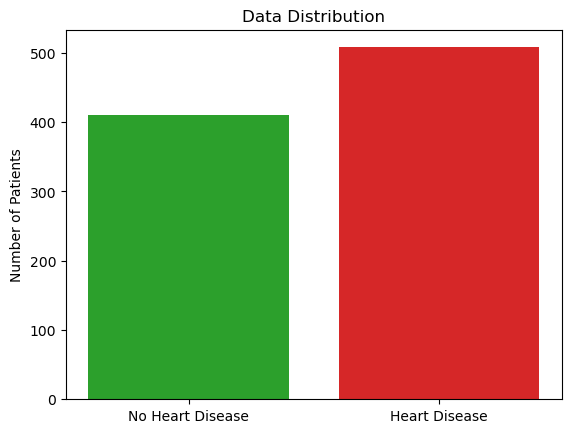

In [76]:
num_healthy = data['HeartDisease'].value_counts().get(0, 0) 
num_heart_disease = data['HeartDisease'].value_counts().get(1, 0)
print("Number of patients without Heart Disease:", num_healthy)
print("Number of patients diagnosed with Heart Disease:", num_heart_disease)
fig, ax = plt.subplots()

counts = [num_healthy, num_heart_disease]
bar_colors = ['tab:green', 'tab:red']

ax.bar(class_names, counts, label=class_names, color=bar_colors)

ax.set_ylabel('Number of Patients')
ax.set_title('Data Distribution')

plt.show()

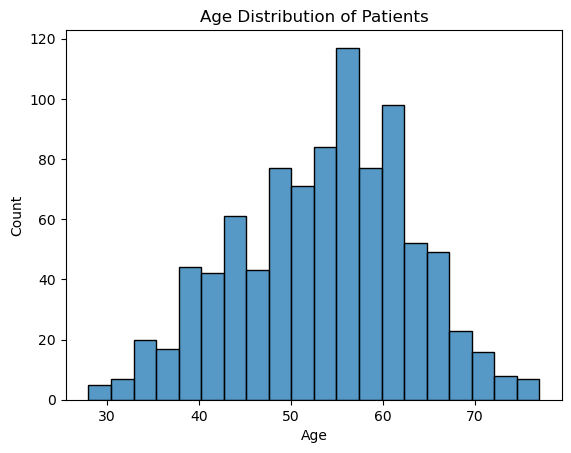

In [78]:
sns.histplot(data['Age'], bins=20)
plt.title('Age Distribution of Patients')
plt.show()

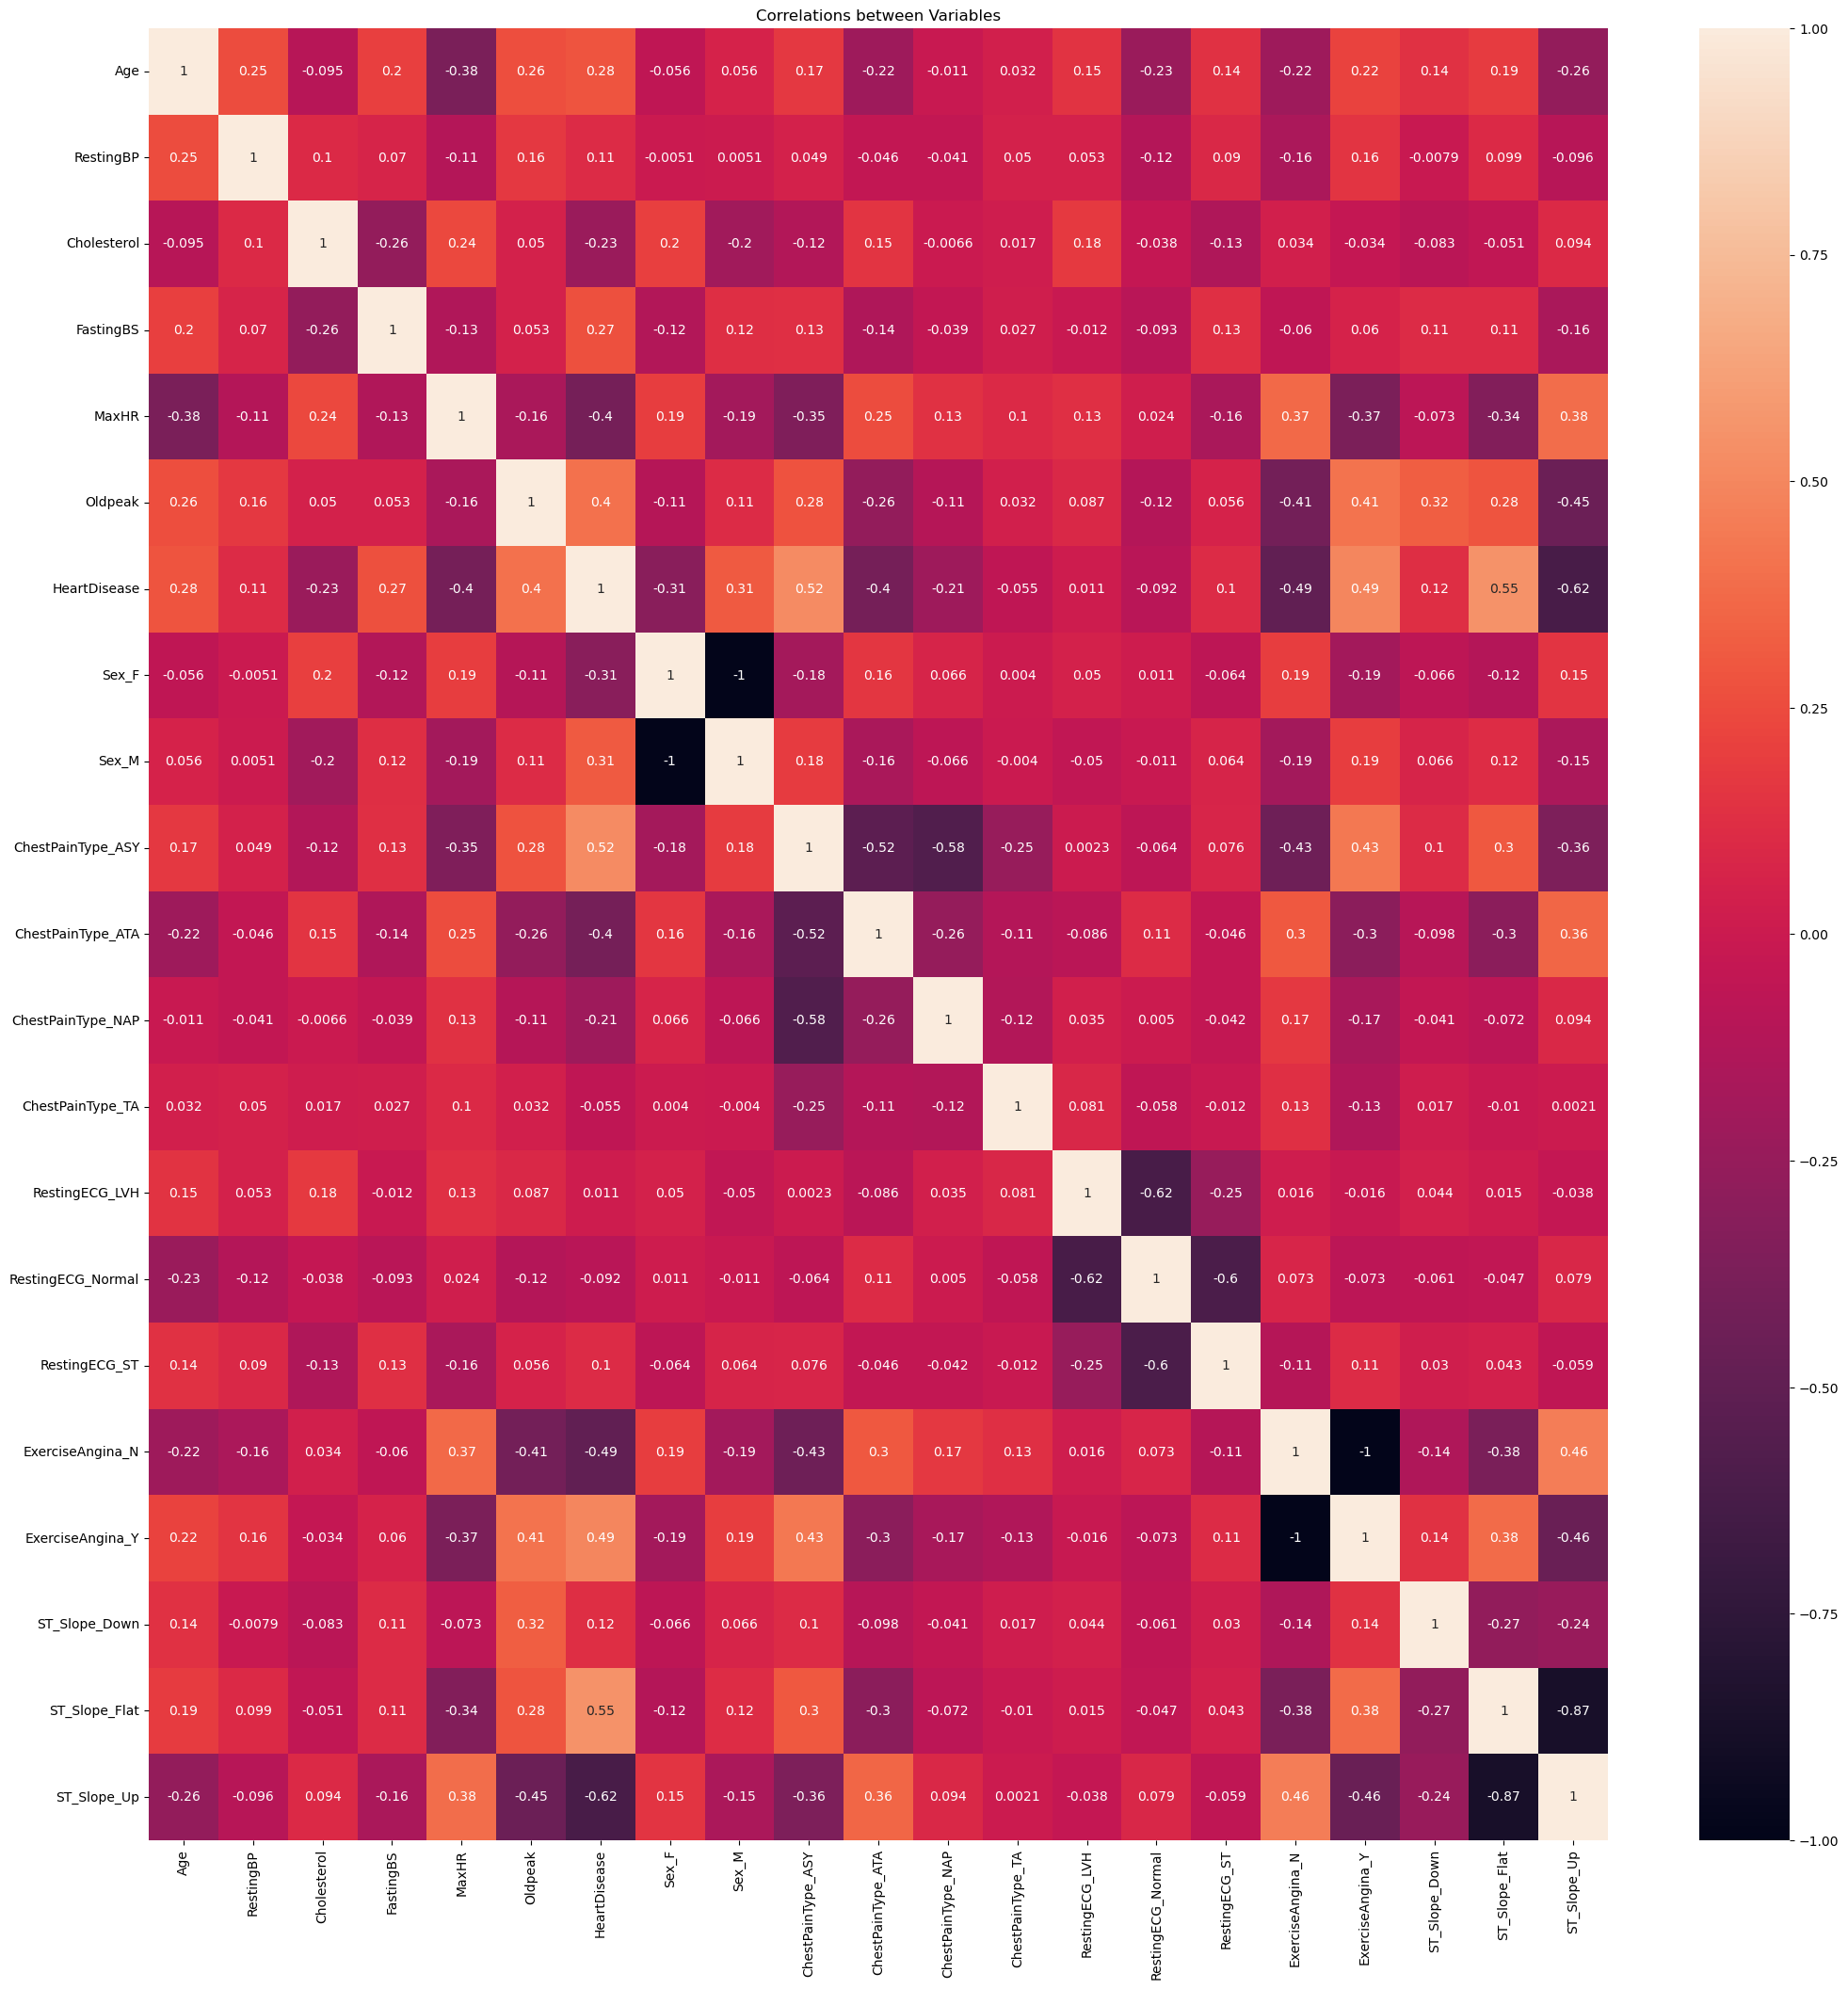

In [80]:
correlations = data.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(correlations, annot=True)
plt.title('Correlations between Variables')
plt.show()

Correlation Heatmap: this is a graphical tool which presents the correlations between all variables as a color-coded matrix.

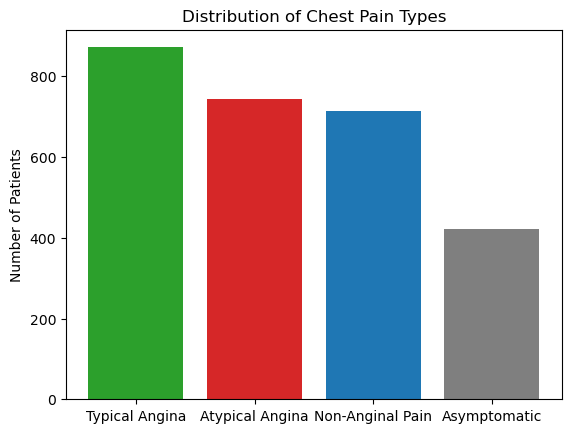

In [83]:
num_ta = data['ChestPainType_TA'].value_counts().get(0, 0) 
num_ata = data['ChestPainType_ATA'].value_counts().get(0, 0)
num_nap = data['ChestPainType_NAP'].value_counts().get(0, 0)
num_asy = data['ChestPainType_ASY'].value_counts().get(0, 0)
fig, ax = plt.subplots()
chest_pain_types= ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
counts = [num_ta, num_ata, num_nap, num_asy ]
bar_colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:gray']

ax.bar(chest_pain_types, counts, label=chest_pain_types, color=bar_colors)

ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Chest Pain Types')

plt.show()

### Splitting Data

In [89]:
features = [x for x in data.columns if x not in 'HeartDisease']

In [91]:
X_train, X_val, y_train, y_val = train_test_split(data[features], data['HeartDisease'], train_size = 0.8)

In [93]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5504


Divides the images into 2 subsets:

Training set - used to train the models

Validation set - intermediary set used for fine-tuning the models and preventing overfitting; while training, it periodically helps assess how well the models generalize to data they haven't been trained on

### Logistic Regression Model

Logistic regression is a basic supervised machine learning algorithm typically used for binary classification tasks and utilizes the sigmoid activation function, which takes the independent variables as input and outputs a probability value between 0 and 1, denoting which of the target classes was predicted. A decision threshold, typically 0.5, is used to classify the outcome into one of the two classes.

In [104]:
from sklearn.linear_model import LogisticRegression

In [106]:
logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [108]:
predictions = logistic_regression_model.predict(X_val)

In [110]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(logistic_regression_model.predict(X_train),y_train):.4f}")
logistic_regression_accuracy=accuracy_score(predictions,y_val)
logistic_regression_precision=precision_score(predictions,y_val)
logistic_regression_recall=recall_score(predictions,y_val)
logistic_regression_f1_score=f1_score(predictions,y_val)
logistic_regression_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {logistic_regression_accuracy:.4f}")
print(f"\tPrecision: {logistic_regression_precision:.4f}")
print(f"\tRecall: {logistic_regression_recall:.4f}")
print(f"\tF1 score: {logistic_regression_f1_score:.4f}")
print(f"\tAUC score: {logistic_regression_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.8774
Metrics validation:
	Accuracy score: 0.8261
	Precision: 0.8173
	Recall: 0.8673
	F1 score: 0.8416
	AUC score: 0.8232


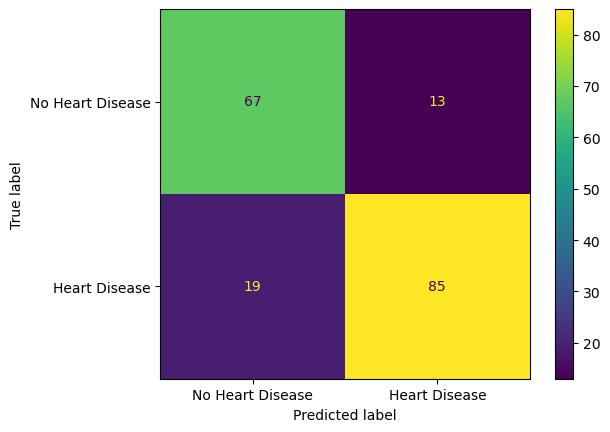

In [112]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Confusion Matrix: also known as an error matrix, a matrix representation of model testing results allowing for the identification of classes that the algorithm is 'confusing' or misidentifying for another class(es).

### Decision Tree Model

Decision Tree classification is a supervised machine learning algorithm with works by recursively splitting the dataset into subsets based on the value of input-features, forming a tree-like structure. its components include the root node, which includes the entire dataset, decision nodes, which are the splits in the tree, and leaf nodes, which are the model's predictions. At every node, the algorithm selects the best feature to split the data and continues splitting recursively until a stopping criterion is met. Critiera used to decide which features to split on include Gini impurity and information gain.

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [146]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

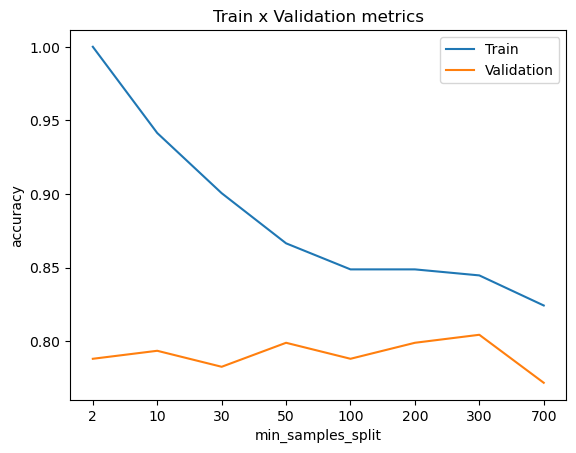

In [148]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

min_samples_split is a parameter of the decision tree algorithm and denotes the minimum number of samples required to split an internal node. Based on this graph, the optimal parameter value to use for this data seems to be 300 samples.

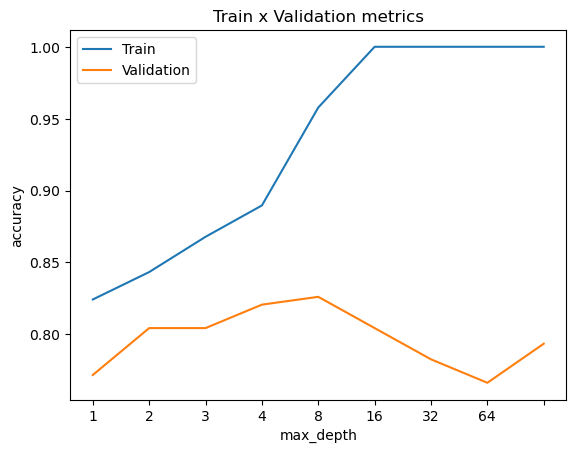

In [152]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Max depth is a parameter of the decision tree algorithm and denotes the maximum depth at which the tree needs to stop splitting. Based on this graph, the optimal parameter value to use for this data seems to be 8 nodes.

In [186]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 300, max_depth = 8).fit(X_train,y_train)

In [188]:
predictions = decision_tree_model.predict(X_val)

In [190]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
decision_tree_accuracy=accuracy_score(predictions,y_val)
decision_tree_precision=precision_score(predictions,y_val)
decision_tree_recall=recall_score(predictions,y_val)
decision_tree_f1_score=f1_score(predictions,y_val)
decision_tree_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {decision_tree_accuracy:.4f}")
print(f"\tPrecision: {decision_tree_precision:.4f}")
print(f"\tRecall: {decision_tree_recall:.4f}")
print(f"\tF1 score: {decision_tree_f1_score:.4f}")
print(f"\tAUC score: {decision_tree_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.8447
Metrics validation:
	Accuracy score: 0.8043
	Precision: 0.8846
	Recall: 0.7931
	F1 score: 0.8364
	AUC score: 0.8083


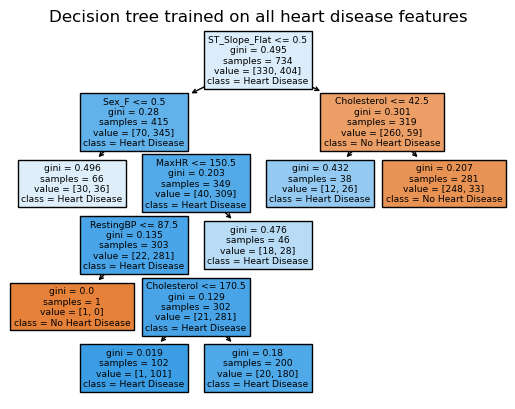

In [192]:
plt.figure()
plot_tree(decision_tree_model, filled=True, class_names=class_names, feature_names=list(data))
plt.title("Decision tree trained on all heart disease features")
plt.show()

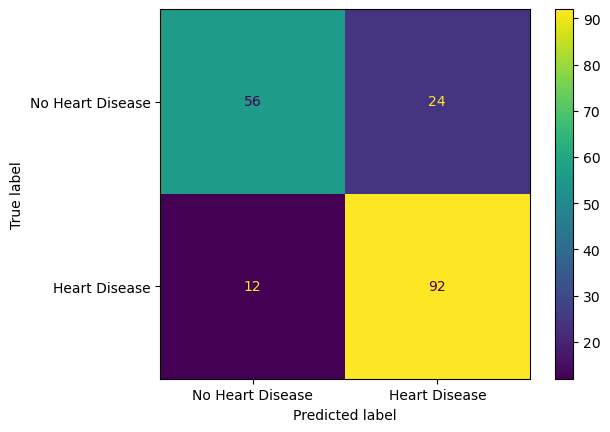

In [174]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### Random Forest Model

Random Forest Classification is an ensemble learning method which constructs multiple decision trees during training and merges their outputs to make the final prediction. It is generally much more accurate and robust than individual decision trees.

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
n_estimators_list = [10,50,100,500]

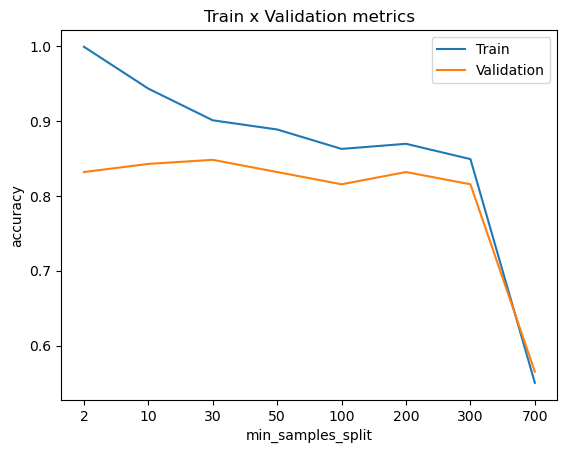

In [181]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Based on the graph, the optimal min_samples_split value to use for this data seems to be 200 samples.

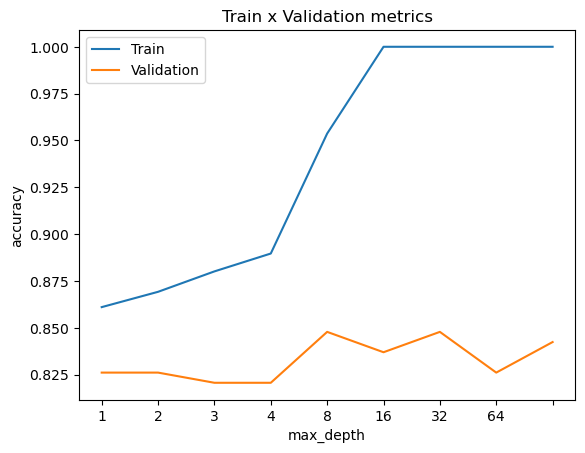

In [182]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Based on the graph, the optimal max_depth value to use for this data seems to be 32 nodes.

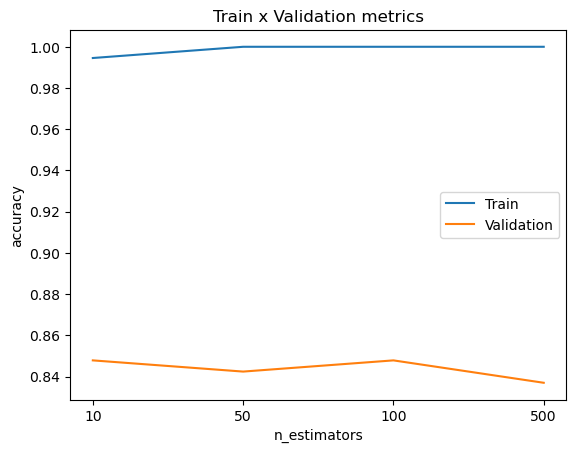

In [199]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Number of estimators(n_estimators) is a parameter of the decision tree algorithm and denotes number of decision trees in the forest. Based on this graph, the optimal parameter value to use for this data seems to be 100 trees.

In [202]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 32, min_samples_split = 200).fit(X_train,y_train)

In [204]:
predictions = random_forest_model.predict(X_val)

In [206]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(predictions,y_val):.4f}")
random_forest_accuracy=accuracy_score(predictions,y_val)
random_forest_precision=precision_score(predictions,y_val)
random_forest_recall=recall_score(predictions,y_val)
random_forest_f1_score=f1_score(predictions,y_val)
random_forest_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {random_forest_accuracy:.4f}")
print(f"\tPrecision: {random_forest_precision:.4f}")
print(f"\tRecall: {random_forest_recall:.4f}")
print(f"\tF1 score: {random_forest_f1_score:.4f}")
print(f"\tAUC score: {random_forest_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.8447
Metrics test:
	Accuracy score: 0.8207
Metrics validation:
	Accuracy score: 0.8207
	Precision: 0.8750
	Recall: 0.8198
	F1 score: 0.8465
	AUC score: 0.8209


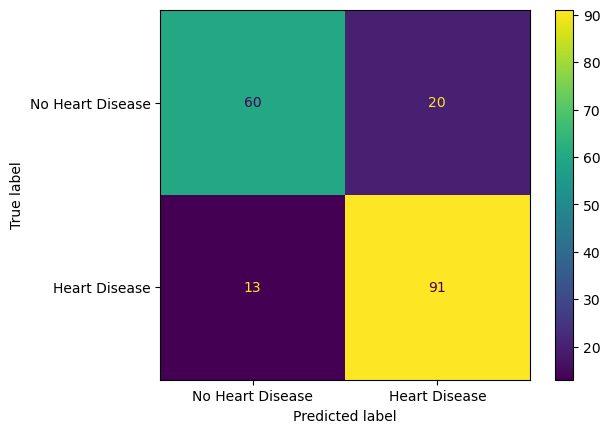

In [208]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### XGBoost Model

XGBoost(Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm with builds an ensemble of decision trees in a sequential manner to optimize performance. The Boosting algorithm sequentially adds new trees that correct errors made by previous trees and gradient boosing uses gradients/erros of the loss function to build new trees that focus on hard-to-classify examples. These models are typically more efficient, accurate, and flexible than random forest classifiers.

In [215]:
from xgboost import XGBClassifier

In [217]:
n = int(len(X_train)*0.8)

In [219]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [221]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.63621
[1]	validation_0-logloss:0.58812
[2]	validation_0-logloss:0.55034
[3]	validation_0-logloss:0.51979
[4]	validation_0-logloss:0.49440
[5]	validation_0-logloss:0.47280
[6]	validation_0-logloss:0.45266
[7]	validation_0-logloss:0.43471
[8]	validation_0-logloss:0.41930
[9]	validation_0-logloss:0.40557
[10]	validation_0-logloss:0.39370
[11]	validation_0-logloss:0.38358
[12]	validation_0-logloss:0.37583
[13]	validation_0-logloss:0.36752
[14]	validation_0-logloss:0.35984
[15]	validation_0-logloss:0.35223
[16]	validation_0-logloss:0.34634
[17]	validation_0-logloss:0.34116
[18]	validation_0-logloss:0.33614
[19]	validation_0-logloss:0.33558
[20]	validation_0-logloss:0.33263
[21]	validation_0-logloss:0.33045
[22]	validation_0-logloss:0.32701
[23]	validation_0-logloss:0.32406
[24]	validation_0-logloss:0.31962
[25]	validation_0-logloss:0.31677
[26]	validation_0-logloss:0.31532
[27]	validation_0-logloss:0.31257
[28]	validation_0-logloss:0.31099
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [224]:
xgb_model.best_iteration

37

In [226]:
predictions = xgb_model.predict(X_val)

In [228]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(predictions,y_val):.4f}")
xgb_accuracy=accuracy_score(predictions,y_val)
xgb_precision=precision_score(predictions,y_val)
xgb_recall=recall_score(predictions,y_val)
xgb_f1_score=f1_score(predictions,y_val)
xgb_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {xgb_accuracy:.4f}")
print(f"\tPrecision: {xgb_precision:.4f}")
print(f"\tRecall: {xgb_recall:.4f}")
print(f"\tF1 score: {xgb_f1_score:.4f}")
print(f"\tAUC score: {xgb_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.9550
Metrics test:
	Accuracy score: 0.8261
Metrics validation:
	Accuracy score: 0.8261
	Precision: 0.8750
	Recall: 0.8273
	F1 score: 0.8505
	AUC score: 0.8258


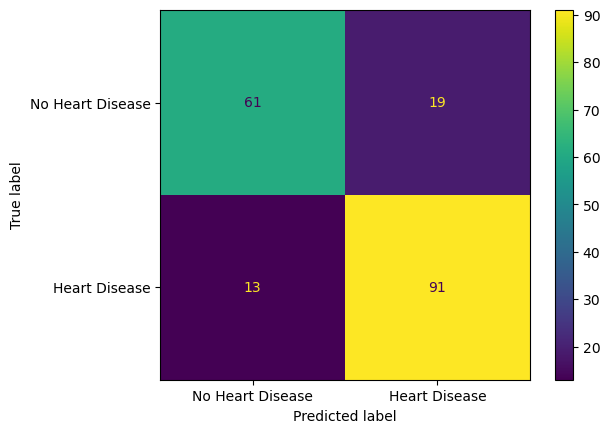

In [230]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### Neural Network Model

Neural networks are a powerful class of machine learning algorithms consisting of interconnected layers of nodes/neurons that work together to recognize patterns and make predictions.

In [332]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [334]:
features = [x for x in data.columns if x not in 'HeartDisease']
X_train, X_temp, y_train, y_temp = train_test_split(data[features], data['HeartDisease'], test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=10)

In [336]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

This standard scaler standardizes the features of the dataset by removing the mean and scaling to unit variance, enruing that each feature contributes equally to the model's convergance. The standardiation transforms the data so it has a mean of 0 and a standard deviation of 1.

In [351]:
nn_model = Sequential([
Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
Dense(32, activation='relu'),
Dense(16, activation='relu'),
Dense(1, activation='sigmoid')
])

Dense Layers: regular neural network layer; 'dense' because each of its neurons are connected to every single neuron of the previous layer

Rectified Linear Unit (ReLU) Activation Function: piecewise linear function which directly outputs positive inputs and outputs zero for any non positive inputs( f(x) = max(0, x) ) 

Sigmoid Activation Function: also referred to as the logistic function, maps input values in binary classification tasks to an output range between 0 and 1; a decision threshold, typically 0.5, is used to classify the outcome into one of the two classes.

In [356]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The Adam Optimizer, short for 'Adaptive Moment Estimation' is an iterative optimization algorithm which continously customizes the learning rate of each parameter based on its gradient history, allowing the algorithm to adapt as training progresses.

In [359]:
nn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1344      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


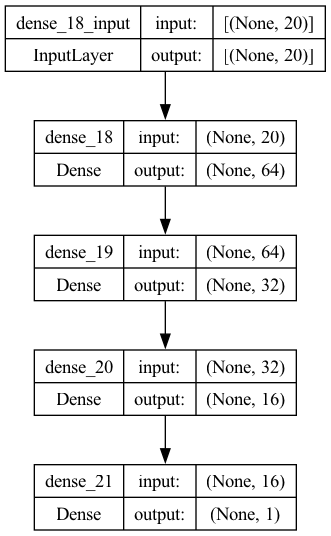

In [361]:
tf.keras.utils.plot_model(
    nn_model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [363]:
my_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
num_epochs=50
history = nn_model.fit(X_train_scaled, y_train, epochs=num_epochs, validation_data=(X_val_scaled, y_val), callbacks=my_callbacks)

Epoch 1/50
21/21 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.7212 - val_loss: 0.5249 - val_accuracy: 0.8394
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8536 - val_loss: 0.4372 - val_accuracy: 0.8290
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8738 - val_loss: 0.4251 - val_accuracy: 0.8187
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8801 - val_loss: 0.4180 - val_accuracy: 0.8135
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8801 - val_loss: 0.4042 - val_accuracy: 0.8342
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8847 - val_loss: 0.4032 - val_accuracy: 0.8290
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.8879 - val_loss: 0.4044 - val_accuracy: 0.8342
Epoch 8/50
21/21 [==

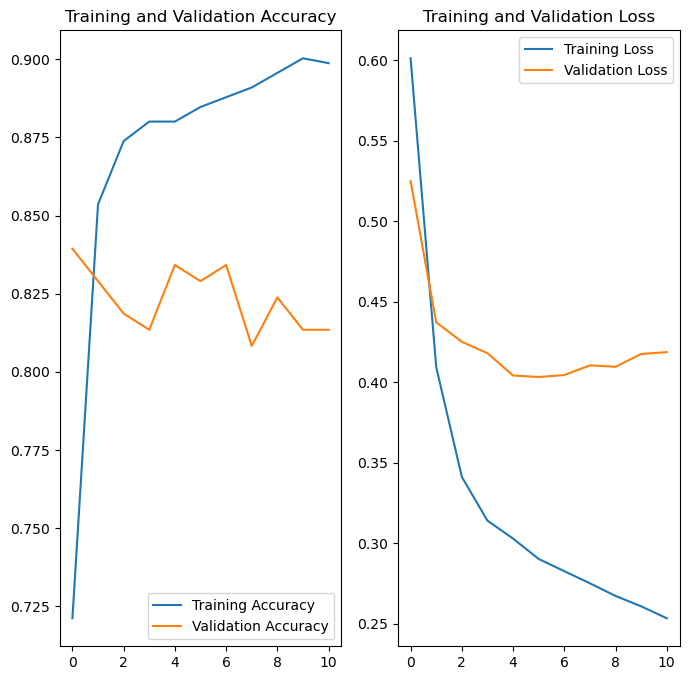

In [365]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [367]:
predictions = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

3/3 [==============================] - 0s 1ms/step


In [369]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)

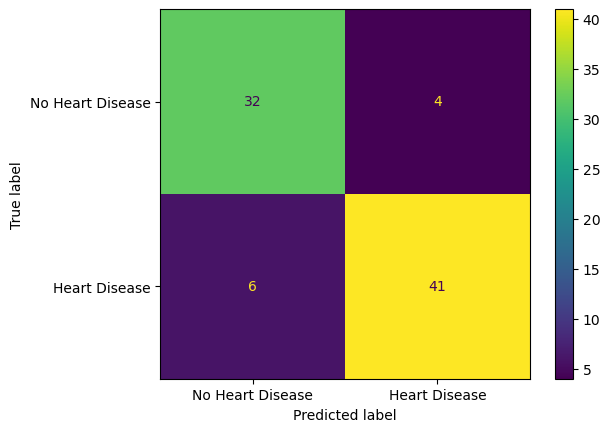

In [371]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [277]:
cr=classification_report(y_test, predictions, target_names=class_names)
print(cr)

                  precision    recall  f1-score   support

No Heart Disease       0.84      0.89      0.86        36
   Heart Disease       0.91      0.87      0.89        47

        accuracy                           0.88        83
       macro avg       0.88      0.88      0.88        83
    weighted avg       0.88      0.88      0.88        83



In [279]:
nn_accuracy=accuracy_score(predictions,y_test)
nn_precision=precision_score(predictions,y_test)
nn_recall=recall_score(predictions,y_test)
nn_f1_score=f1_score(predictions,y_test)
nn_auc_score=roc_auc_score(predictions,y_test)
print(f"Metrics validation:\n\tAccuracy score: {nn_accuracy:.4f}")
print(f"\tPrecision: {nn_precision:.4f}")
print(f"\tRecall: {nn_recall:.4f}")
print(f"\tF1 score: {nn_f1_score:.4f}")
print(f"\tAUC score: {nn_auc_score:.4f}")

Metrics validation:
	Accuracy score: 0.8795
	Precision: 0.8723
	Recall: 0.9111
	F1 score: 0.8913
	AUC score: 0.8766


### Comparing Models

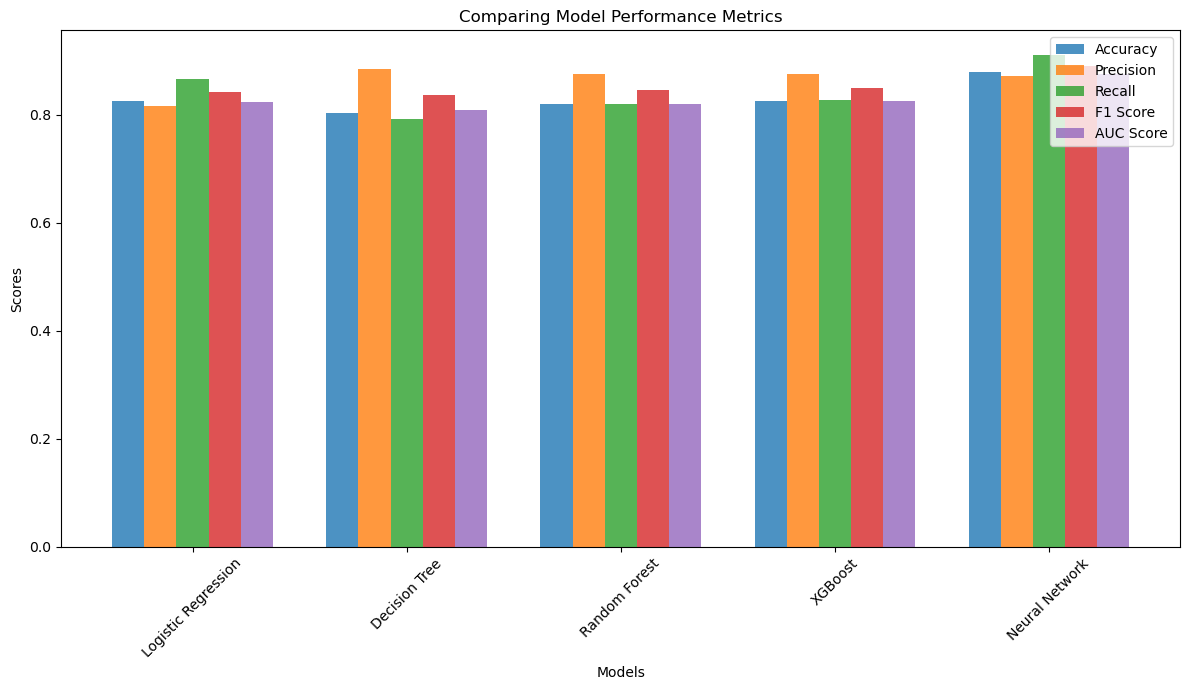

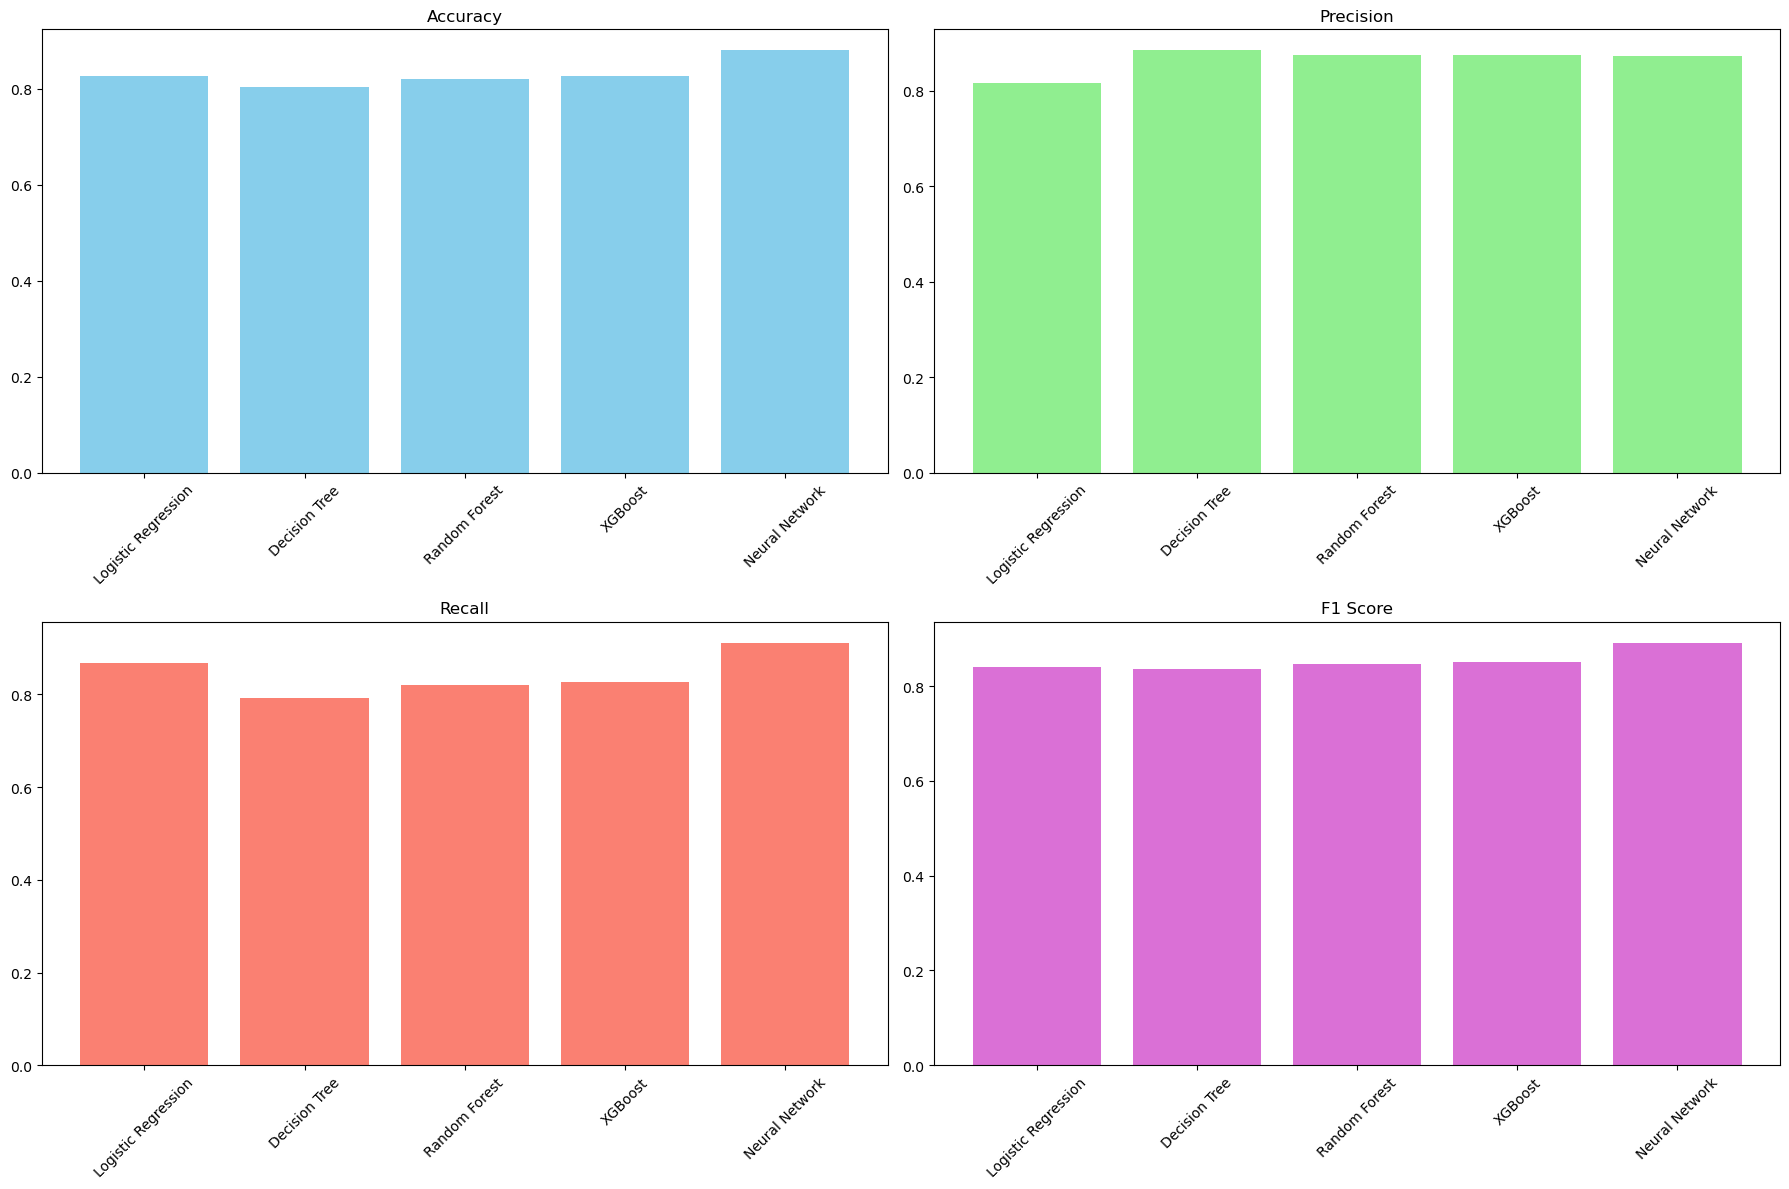

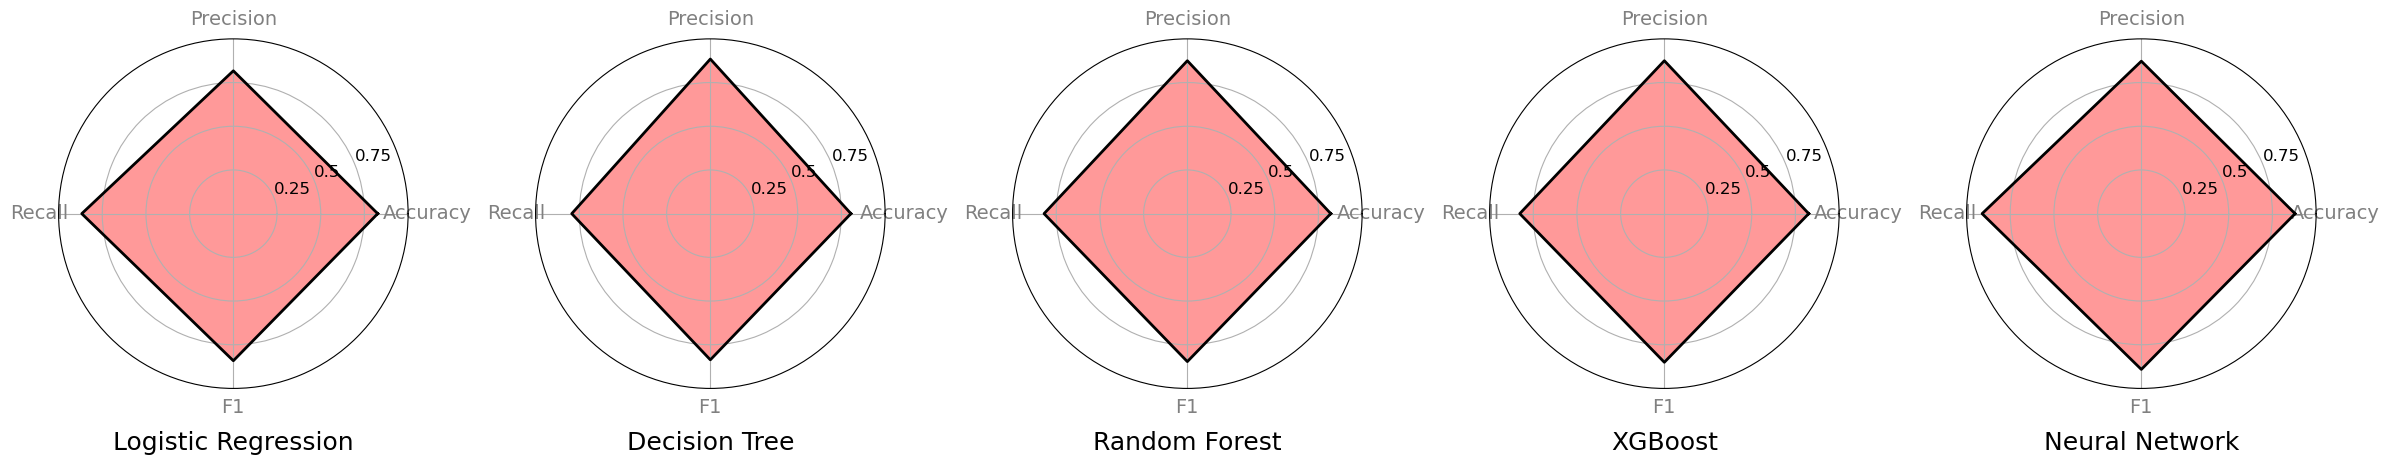

In [282]:
model_names = [
"Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"
]
accuracy_scores = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, xgb_accuracy, nn_accuracy]
precision_scores = [logistic_regression_precision, decision_tree_precision, random_forest_precision, xgb_precision, nn_precision]
recall_scores = [logistic_regression_recall, decision_tree_recall, random_forest_recall, xgb_recall, nn_recall]
f1_scores = [logistic_regression_f1_score, decision_tree_f1_score, random_forest_f1_score, xgb_f1_score, nn_f1_score]
AUC_scores = [logistic_regression_auc_score, decision_tree_auc_score, random_forest_auc_score, xgb_auc_score, nn_auc_score]
fig, ax = plt.subplots(figsize=(12, 7))
index_1 = np.arange(len(model_names))
bar_width = 0.15
opacity = 0.8
bar1 = ax.bar(index_1 - bar_width*2, accuracy_scores, bar_width, alpha=opacity, label='Accuracy')
bar2 = ax.bar(index_1 - bar_width, precision_scores, bar_width, alpha=opacity, label='Precision')
bar3 = ax.bar(index_1, recall_scores, bar_width, alpha=opacity, label='Recall')
bar4 = ax.bar(index_1 + bar_width, f1_scores, bar_width, alpha=opacity, label='F1 Score')
bar5 = ax.bar(index_1 + bar_width*2, AUC_scores, bar_width, alpha=opacity, label='AUC Score')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparing Model Performance Metrics')
ax.set_xticks(index_1)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs[0, 0].bar(model_names, accuracy_scores, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].tick_params('x', rotation=45)
axs[0, 1].bar(model_names, precision_scores, color='lightgreen')
axs[0, 1].set_title('Precision')
axs[0, 1].tick_params('x', rotation=45)
axs[1, 0].bar(model_names, recall_scores, color='salmon')
axs[1, 0].set_title('Recall')
axs[1, 0].tick_params('x', rotation=45)
axs[1, 1].bar(model_names, f1_scores, color='orchid')
axs[1, 1].set_title('F1 Score')
axs[1, 1].tick_params('x', rotation=45)
plt.tight_layout()
plt.show()

model_metrics = {
'Logistic Regression': [logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1_score],
'Decision Tree': [decision_tree_accuracy, decision_tree_precision,  decision_tree_recall, decision_tree_f1_score],
'Random Forest': [random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1_score],
'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1_score],
'Neural Network': [nn_accuracy, nn_precision, nn_recall, nn_f1_score],
}
def plot_model_metrics(name, scores, position): 
    metrics_df = pd.DataFrame({
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'Scores': scores
    })
    metrics_count = len(metrics_df['Metrics'])
    angles = np.linspace(0, 2 * np.pi, metrics_count, endpoint=False).tolist()
    angles += angles[:1]
    ax = plt.subplot(2, 5, position, polar=True)
    plt.xticks(angles[:-1], metrics_df['Metrics'], color='gray', size=14)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="black", size=12)
    plt.ylim(0,1)
    scores += scores[:1]
    ax.plot(angles, scores, color='black', linewidth=2, linestyle='solid')
    ax.fill(angles, scores, color='red', alpha=0.4)
    plt.title(name, size=18, color='black', y=-0.2)
plt.figure(figsize=(24, 12))
chart_position = 1
for model, performance_scores in model_metrics.items():
    plot_model_metrics(model, performance_scores, chart_position)
    chart_position += 1
plt.tight_layout()
plt.show()

Accuracy is a metric used to measure how often the model correctly predicts the outcome; Acc = # Correct Predictions / # Total Predictions.

Precision: a metric which measures model performance in terms of quality; calculated as the ratio between the number of 'True Positives' and the sum of the number of 'True Positives' and the number of 'False Positives'; a high precision indicates that the model returns more relevant or 'precise' results than irrelevant ones.

Recall: a metric which measures model performance in terms of quantity; calculated as the ratio between the number of 'True Positives' and the sum of the number of 'True Positives' and the number of 'False Negatives'; a high recall indicates that the model returns most of the relevant results, regardless of how many irrelevant results are also returned.

F1-Score: measures predictive model performance by integrating precision and recall into a single metric; calculated as the harmonic mean of the precision and recall scores; ranges from 0 to 1, with 0 indicating poor performance and 1 indicating perfect performance.

AUC Score: stands for 'Area under the [ROC] curve'; the receiver operating characteristic[ROC] curve is a graph displaying the perfocemance of a classification model at all classification thresholds, plotting the true positive rate against the false positive rate; The AUC score summarizes this curve and measures the ability of the classifier to distinguish between positive and negative classes.

Based on the visualizations, model performance for all five algorithms was satisfactory and there was not much discrepancy in metrics between them. However, the neural network model proved to be the most effective algorithm overall for the classification task.